In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('ushape.csv')

In [4]:
df.head()

,X,Y,class
0,2.1200,-0.0462,1.0
1,0.8820,-0.0758,0.0
2,-0.0551,-0.0373,1.0
3,0.8300,-0.5390,1.0
4,2.1100,0.6620,1.0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


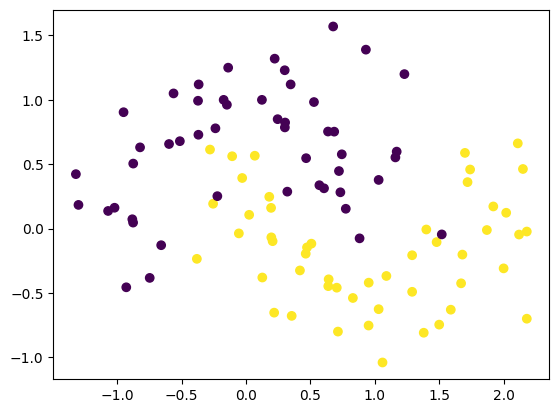

In [6]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [7]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [8]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.get_weights()

[array([[ 0.5213298 ,  1.076828  , -0.8161492 ,  0.7516045 , -1.2805327 ,
          0.79702985,  0.8473631 ,  0.9303767 ,  1.4715058 ,  0.45128077],
        [ 0.01711713, -0.3586774 ,  0.43619254,  0.93331325,  0.3953872 ,
         -1.9657433 , -0.757034  , -1.0115898 , -0.41884837,  1.1507244 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.33298317, -0.18284476, -0.20318334, -0.80423194, -0.27034882,
          0.10757444, -0.15366487, -0.7296612 , -0.81762475, -0.16671616],
        [ 0.6656101 ,  0.30323225,  0.7138618 , -0.14943488, -0.5117915 ,
         -0.28629827, -0.4478929 ,  0.2173848 , -0.05168872,  0.1583741 ],
        [-0.501248  , -0.8821608 ,  0.1760554 , -0.9966915 ,  0.14127302,
         -0.6166198 ,  0.77501214,  0.35652295,  0.7548414 , -0.3019866 ],
        [ 0.30230135, -0.33172867, -0.11804229, -0.34102303,  0.5603424 ,
          0.14104152,  0.872988  ,  0.04457126,  0.2804007 , -0.5678764 ],
        [-0.68571

In [11]:
initial_weights = model.get_weights()

In [12]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [13]:
model.set_weights(initial_weights)

In [14]:
model.get_weights()

[array([[ 0.7582516 , -0.5922268 ,  0.1332875 ,  0.0123149 , -0.7059838 ,
          0.7639699 ,  0.81779146,  1.0231158 ,  0.14994307, -0.09511442],
        [-0.6728846 , -0.58510005, -1.5250236 ,  0.02502445,  0.15058559,
         -0.6685171 , -1.5199373 , -0.38377002,  1.5719736 ,  0.40203482]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.16279756,  0.13331966, -0.1280663 ,  0.20163202,  0.04718416,
         -0.3128861 , -0.3126666 , -0.1707661 , -0.10943286, -0.51371086],
        [ 0.05952242,  0.35645413,  0.19293076,  0.1225248 , -0.25516412,
         -0.55546874, -0.07405498,  0.36581782, -0.34971547,  0.20077948],
        [ 0.11003344, -0.18746485,  0.2625536 ,  0.04306325, -0.2901718 ,
          0.16674559, -0.13921422,  0.11637297, -0.20091239,  0.54444915],
        [ 0.10351827, -0.2421092 , -0.13299635, -0.36971867,  0.0257004 ,
          0.5983844 ,  0.15450454,  0.12527132, -0.75621504,  0.51013005],
        [ 0.05305

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 180ms/step - loss: 0.8654 - accuracy: 0.4937 - val_loss: 0.8102 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 34ms/step - loss: 0.8242 - accuracy: 0.4937 - val_loss: 0.7755 - val_accuracy: 0.5500
Epoch 3/100
3/3 [==============================] - 0s 39ms/step - loss: 0.7925 - accuracy: 0.4937 - val_loss: 0.7449 - val_accuracy: 0.5500
Epoch 4/100
3/3 [==============================] - 0s 37ms/step - loss: 0.7626 - accuracy: 0.4937 - val_loss: 0.7197 - val_accuracy: 0.5500
Epoch 5/100
3/3 [==============================] - 0s 29ms/step - loss: 0.7402 - accuracy: 0.5063 - val_loss: 0.7014 - val_accuracy: 0.6000
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 0.7242 - accuracy: 0.5316 - val_loss: 0.6880 - val_accuracy: 0.6000
Epoch 7/100
3/3 [==============================] - 0s 32ms/step - loss: 0.7096 - accuracy: 0.5443 - val_loss: 0.6761 - val_accuracy: 0.6000
Epoch 8/100
3/3 [==

In [ ]:
model.get_weights()

[array([[-0.7534644 , -0.40642726, -0.46373174, -0.7715832 , -0.1277438 ,
         -0.2729551 ,  0.34282172, -0.2771892 , -0.26632193, -1.429772  ],
        [ 1.0737787 ,  0.47488663,  0.62465155, -0.12547861,  0.20325062,
         -0.28902182, -0.28489602, -0.7651134 ,  0.32014093,  0.38592413]],
       dtype=float32),
 array([ 0.17320989,  0.00114872,  0.0397424 , -0.13545433,  0.00454802,
        -0.22851905, -0.04516467,  0.15110366, -0.06830908,  0.17423655],
       dtype=float32),
 array([[ 0.07947282,  0.26585355,  0.15415847, -0.25968108, -0.01067472,
          0.37633535,  0.03868366, -0.38048545, -0.19025889, -0.65158546],
        [-0.85772514, -0.04266584,  0.12410757, -0.38518146,  0.4134989 ,
         -0.11743478, -0.66751945,  0.37822312, -0.16036926, -0.14447264],
        [-0.14926817, -0.04317714,  0.24179652, -0.20616755,  0.4172752 ,
         -0.737155  , -0.17425217,  0.3156445 , -0.3552739 , -0.395115  ],
        [-0.26271275, -0.16797927,  0.30563584, -0.03270569, 

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

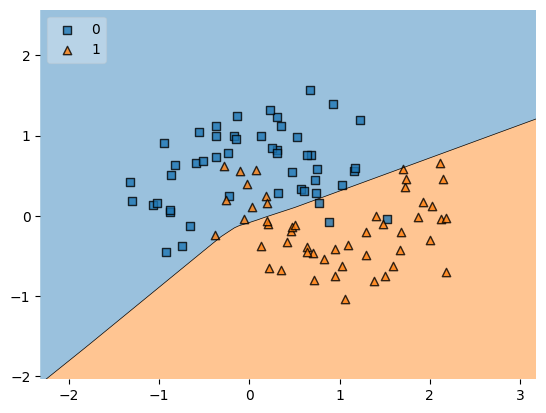

In [17]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [18]:
(np.random.randn(10,10)*0.01).min()

-0.020387312902884976

In [19]:
(np.random.randn(10,10)*0.01).max()

0.02129420197811741